In [3]:
#STATSMODELS
#statistical models, hypothesis tests and data explorations
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load Guerry dataset from R datasets
data = sm.datasets.get_rdataset("Guerry", "HistData").data
type(data)
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [4]:
#Fit OLS regression use ln
res = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.90e-08
Time:                        11:47:29   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [5]:
# Generate random data for illustration
nobs = 100
X = np.random.random((nobs,2))
X = sm.add_constant(X)

beta=[1,.1,.5] # Coefficients
e=np.random.random(nobs) # Error
y=np.dot(X,beta) + e

# Fit OLS model using numpy arrays
res_2 = sm.OLS(y,X).fit()
res_2.summary()
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [6]:
#Getting Started with statsmodels
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
df = sm.datasets.get_rdataset("Guerry", "HistData").data
vars=["Department", "Lottery", "Literacy", "Wealth", "Region"]
df=df[vars]
df.head()
df=df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  85 non-null     object
 1   Lottery     85 non-null     int64 
 2   Literacy    85 non-null     int64 
 3   Wealth      85 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [7]:
#OLS: Ordinary List Squares
#B^ = (X^I*X)^-1*X^1*y
#NX|Lottery
#Endogenous (dependent, response, regressand)
#Exogenous (independent, regressor)

Y,x = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')
type(Y)
Y.head()
x.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


Intercept          246.434135
Literacy            -0.488923
np.log(Pop1831)    -31.311392
dtype: float64
0.3484706112599608

    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanob

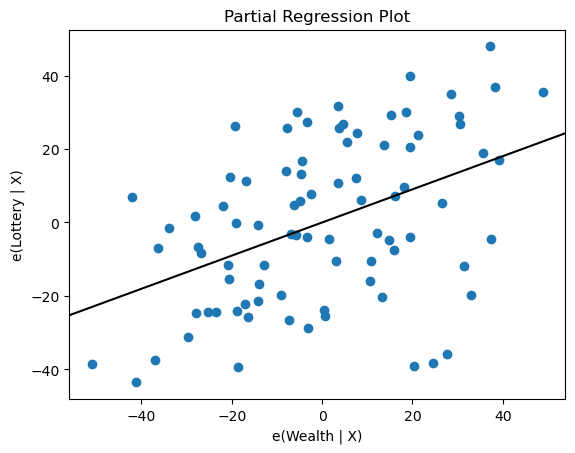

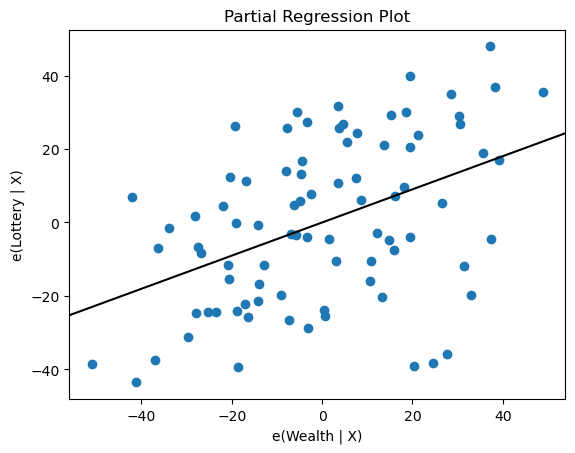

In [8]:
#Model Fit and Summary
#Describe Model
model = sm.OLS(Y,x)
#Summarize Model
res.summary()
print(res.params)
print(res.rsquared)

#Fit Model
res = model.fit()
#Diagnostic and Specifications
sm.stats.linear_rainbow(res)
print(sm.stats.linear_rainbow.__doc__)
#Homoskedastic | Heteroskedastic
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region','Literacy'], data=df, obs_labels=False)

In [9]:
#Fitting Models using R-Style Formulas
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[["Lottery", "Literacy", "Wealth", "Region"]].dropna()
df.info()
df.head()
df.Region.unique()
res = smf.ols(formula = "Lottery ~ Literacy + Wealth + Region", data=df).fit()
res.summary()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Lottery   85 non-null     int64 
 1   Literacy  85 non-null     int64 
 2   Wealth    85 non-null     int64 
 3   Region    85 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.07e-05
Time:                        11:47:56   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Categorical Variables
res = smf.ols(formula = "Lottery ~ Literacy + Wealth + C(Region) -1", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.07e-05
Time:                        11:48:01   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Region)[C]    38.6517      9.456      4.087      0.000      19.826      57.478
C(Region)[E]    23.2239     14.931      1.555      0.124      -6.501      52.949
C(Region)[N]    28.6347     13.127      2.181      0.032       2.501      54.769
C(Region)[S]    34.1034     10.370      3.289      0.002      13.459      54.748
C(Region)[W]    28.5604     10.018      2.851      0.006       8.616      48.505
Literacy        -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth           0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Interactions Matrix
res = smf.ols(formula = "Lottery ~ Literacy:Wealth + C(Region)", data=df).fit()
res.summary()
#-1 without Region
#print(res.params)
#Interactions Individual Cols
res_ind = smf.ols(formula = "Lottery ~ Literacy*Wealth + C(Region)", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4.700
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           0.000827
Time:                        11:48:05   Log-Likelihood:                -381.76
No. Observations:                  85   AIC:                             775.5
Df Residuals:                      79   BIC:                             790.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          47.8130      5.909      8.092      0.000      36.051      59.575
C(Region)[T.E]    -31.8424      8.850     -3.598      0.001     -49.459     -14.226
C(Region)[T.N]    -27.6259      7.707     -3.584      0.001     -42.967     -12.285
C(Region)[T.S]     -8.8565      7.752     -1.143      0.257     -24.285       6.573
C(Region)[T.W]    -11.0910      7.734     -1.434      0.156     -26.486       4.304
Literacy:Wealth     0.0070      0.002      2.989      0.004       0.002       0.012
==============================================================================
Omnibus:                        8.998   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.891
Skew:                          -0.251   Prob(JB):                        0.143
Kurtosis:                       2.079   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Functions
res = smf.ols(formula = "Lottery ~ np.log(Literacy)", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           0.000144
Time:                        11:48:08   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          115.6091     18.374      6.292      0.000      79.064     152.155
np.log(Literacy)   -20.3940      5.116     -3.986      0.000     -30.570     -10.218
==============================================================================
Omnibus:                        8.907   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                3.299
Skew:                           0.108   Prob(JB):                        0.192
Kurtosis:                       2.059   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
def log_plus_1(x):
    return np.log(x) + 1
res = smf.ols(formula = "Lottery ~ log_plus_1(Literacy)", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           0.000144
Time:                        11:48:12   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              136.0031     23.454      5.799      0.000      89.354     182.652
log_plus_1(Literacy)   -20.3940      5.116     -3.986      0.000     -30.570     -10.218
==============================================================================
Omnibus:                        8.907   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                3.299
Skew:                           0.108   Prob(JB):                        0.192
Kurtosis:                       2.059   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Example with random data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [15]:
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x**2))
beta = np.array([1,0.1, 10])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e
res = sm.OLS(y,X).fit()
res.summary()
print("R2:", res.rsquared)

R2: 0.9999910791623945


In [16]:
#OLS non-linear curve but linear in parameters
nsample = 100
sig=0.5
x = np.linspace(0,20,nsample)
X = np.column_stack((x,np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5,0.5,-0.02,5.])
y_true = np.dot(X, beta)
y = y_true + sig*np.random.normal(size=nsample)
res_2 = sm.OLS(y,X).fit()
res.summary()
print("Parameters:", res_2.params)
print("Std Errors:", res_2.bse)
print("Pred Values:", res_2.predict())
print("R Squared:", res_2.rsquared)

Parameters: [ 0.51514159  0.4969669  -0.02146912  4.94652663]
Std Errors: [0.01823382 0.07046293 0.00160224 0.11822806]
Pred Values: [ 4.40979871  4.65607931  4.89655171  5.12732507  5.34483179  5.54597257
  5.72824251  5.88983296  6.02970513  6.14763228  6.24420899  6.32082699
  6.37961847  6.42336945  6.45540642  6.47946104  6.49951834  6.51965471
  6.543872    6.57593482  6.6192174   6.67656634  6.75018483  6.84154306
  6.95131838  7.07936779  7.22473375  7.38568311  7.55977761  7.74397305
  7.93474311  8.12822281  8.32036563  8.50710821  8.68453551  8.84904013
  8.99746899  9.12725159  9.23650458  9.32410833  9.38975249  9.43394861
  9.45800932  9.46399498  9.45462981  9.43319116  9.40337616  9.36915136
  9.3345914   9.30371328  9.28031295  9.26781096  9.26911329  9.28649319
  9.32149869  9.37488965  9.44660685  9.5357744   9.64073539  9.75911921
  9.88793806 10.02370842 10.16259276 10.30055559 10.43352766 10.55757141
 10.66904116 10.76473139 10.84200709 10.89891098 10.9342431  10.

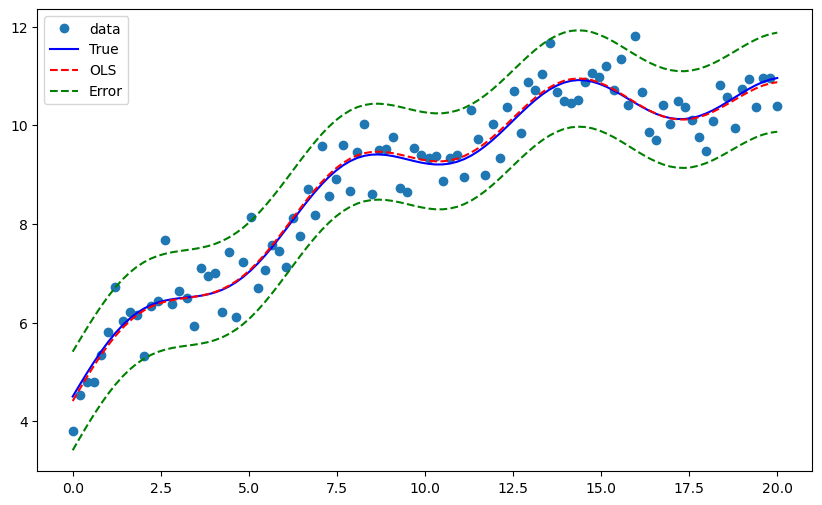

In [17]:
# Plot comparison between OLS and true values
from statsmodels.sandbox.regression.predstd import wls_prediction_std

def plot_compare(res):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,'o',label='data')
    ax.plot(x,y_true,'b-',label="True")
    ax.plot(x, res.fittedvalues,'r--',label="OLS")
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")
plot_compare(res_2)

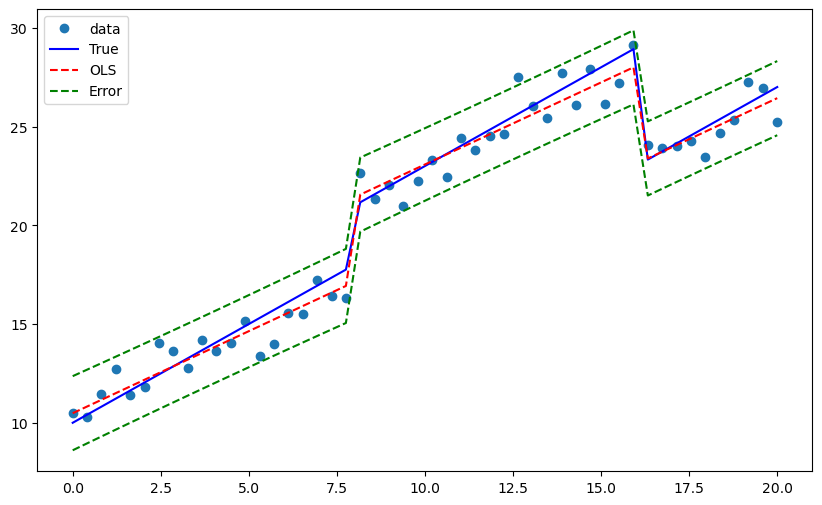

In [18]:
#with Dummy Variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

nsample = 50
groups=np.zeros(nsample,int)
groups[20:40] = 1
groups[40:] = 2
dummy = pd.get_dummies(groups).values
x = np.linspace(0,20,nsample)
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend = False)
beta = [1,3,-3,10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e #dummy groups
res = sm.OLS(y,X).fit()
plot_compare(res)

In [19]:
#Generalized Least Squares
import statsmodels.api as sm
import pandas as pd
#Longley datasets TimeSeries
data = sm.datasets.longley.load()
#as_pandas=False
data.exog = sm.add_constant(data.exog)
#Heteroskedastic
#Variability of some random disturbance and it's different across all elements of the vector
#Variance of a measure/Any other measure of statistical dispersion
ols_resid = sm.OLS(data.endog, data.exog).fit().resid
#Args Process with trend
#Ei (resid) = Bo + p(loged)*E*i -1 + 3i where y~N(0,E^2)
# Create a DataFrame with residuals and lagged residuals
df_resid = pd.DataFrame({'Residuals': ols_resid, 'Lagged_Residuals': ols_resid.shift(1)})

# Drop the first row containing NaN due to shifting
df_resid = df_resid.dropna()

# Fit OLS model on the residuals and lagged residuals
resid_fit = sm.OLS(df_resid['Residuals'], sm.add_constant(df_resid['Lagged_Residuals'])).fit()

# Print t-value and p-value for the Lagged Residual Coefficient
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])
rho = resid_fit.params[1]
print(rho)

-1.4390229839705615
0.17378444788898745
-0.3634294908762582


In [20]:
# Create a Toeplitz matrix
from scipy.linalg import toeplitz
toeplitz(range(5))
order = toeplitz(range(len(ols_resid)))
sigma=rho**order

# Fit GLS model using the Toeplitz matrix
gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)
gls_results = gls_model.fit()
gls_results.summary()

# Fit GLSAR (Generalized Least Squares with Autoregressive errors) model iteratively
glsar_model = sm.GLSAR(data.endog, data.exog,1)
glsar_results=glsar_model.iterative_fit(1)
glsar_results.summary()

# Print parameters and standard errors for both GLS and GLSAR models
print(gls_results.params)
print(gls_results.bse)
print(glsar_results.params)
print(glsar_results.bse)

const     -3.797855e+06
GNPDEFL   -1.276565e+01
GNP       -3.800132e-02
UNEMP     -2.186949e+00
ARMED     -1.151776e+00
POP       -6.805356e-02
YEAR       1.993953e+03
dtype: float64
const      670688.699308
GNPDEFL        69.430807
GNP             0.026248
UNEMP           0.382393
ARMED           0.165253
POP             0.176428
YEAR          342.634628
dtype: float64
const     -3.467961e+06
GNPDEFL    3.455678e+01
GNP       -3.434101e-02
UNEMP     -1.962144e+00
ARMED     -1.001973e+00
POP       -9.780460e-02
YEAR       1.823183e+03
dtype: float64
const      871584.051696
GNPDEFL        84.733715
GNP             0.032803
UNEMP           0.480545
ARMED           0.211384
POP             0.224774
YEAR          445.828748
dtype: float64


C:\Users\Giacomo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Giacomo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
#Quantile Regression
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
# Load the Engel dataset
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [22]:
# Least Absolute Deviation (Quantile Regression)
model = smf.quantreg('foodexp ~ income', data)
res = model.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Thu, 15 Feb 2024   No. Observations:                  235
Time:                        11:49:15   Df Residuals:                      233
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586
==============================================================================

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Visualize Results
quantiles = np.arange(.05,.96,.1)
# Function to fit quantile regression models
def fit_models(q):
    res = model.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + res.conf_int().loc['income'].tolist()
models=[fit_models(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])
# Fit OLS model for comparison
ols = smf.ols('foodexp ~ income', data).fit()
ols_ci = ols.conf_int().loc['income']. tolist()
ols_dict = dict(a=ols.params['Intercept'], b=ols.params['income'], lb=ols_ci[0], ub=ols_ci[1])
print(models)
print(ols_dict)

      q           a         b        lb        ub
0  0.05  124.880097  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033435  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.47538852370562, 'b': 0.48517842367692354, 'lb': 0.4568738130184233, 'ub': 0.5134830343354237}


Text(0, 0.5, 'Food Expenditure')

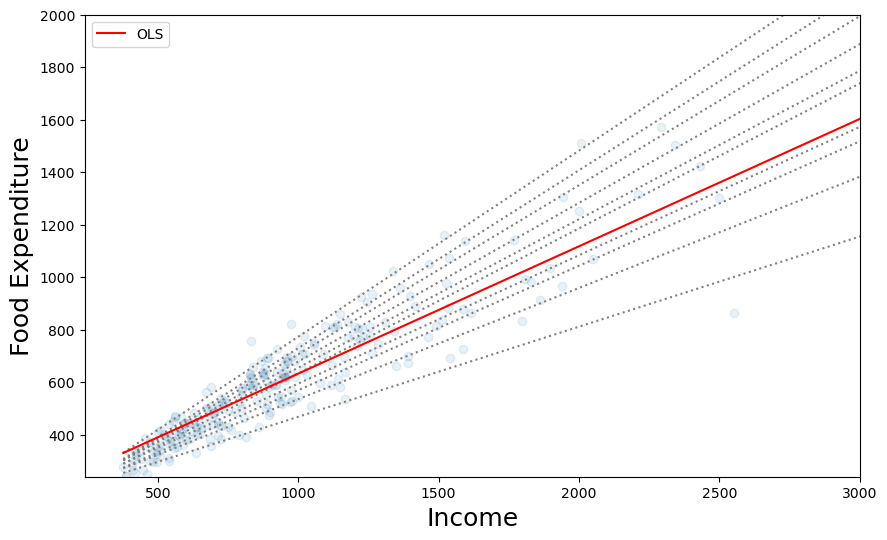

In [24]:
#First Plot
#Best fit line for 10 quantile regression models to the least squares fit
x=np.arange(data.income.min(), data.income.max(), 50)
get_y=lambda a, b: a + b * x
fig, ax = plt.subplots(figsize=(10,6))
for i in range(models.shape[0]):
    y=get_y(models.a[i],models.b[i])
    ax.plot(x,y, linestyle='dotted', color='grey')
y=get_y(ols_dict['a'], ols_dict['b'])
ax.plot(x,y,color="red", label="OLS")
ax.scatter(data.income, data.foodexp, alpha=0.1)
ax.set_xlim((240,3000))
ax.set_ylim((240,2000))
legend=ax.legend()
ax.set_xlabel('Income', fontsize=18)
ax.set_ylabel('Food Expenditure', fontsize=18)
    

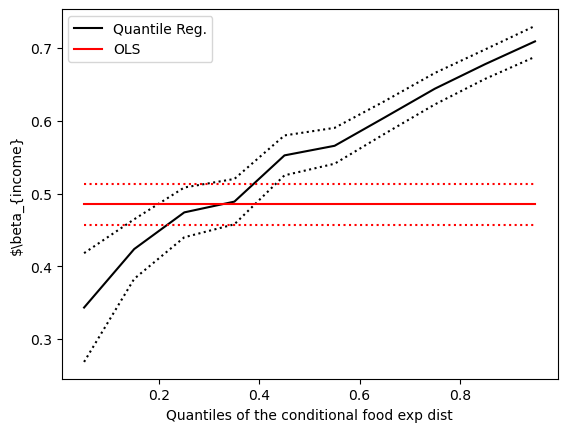

In [25]:
n = models.shape[0]
# Plot for QUANTILE REGRESSION
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
# Plot for OLS
p4 = plt.plot(models.q, [ols_dict['b']] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols_dict['lb']] * n, color="red", linestyle="dotted")
p6 = plt.plot(models.q, [ols_dict['ub']] * n, color="red", linestyle="dotted")
plt.ylabel(r'$\beta_{income}')
plt.xlabel("Quantiles of the conditional food exp dist")
plt.legend();

In [26]:
#Recursive Least Squares (Copper Dataset)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Copper dataset
print(sm.datasets.copper.DESCRLONG)

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



In [27]:
data = sm.datasets.copper.load_pandas().data
data.head()


,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


In [28]:
data.columns

Index(['WORLDCONSUMPTION', 'COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX', 'TIME'],
      dtype='object')

In [29]:
# Set the index to a date range
data.index=pd.date_range("1951-01-01", "1975-01-01", freq="AS")
# Specify the endogenous variable and exogenous variables
endog=data['WORLDCONSUMPTION']
exog=sm.add_constant(data[['COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX']])
# Fit Recursive Least Squares (RLS) model
model = sm.RecursiveLS(endog,exog)
res=model.fit()
res.summary()
res.recursive_coefficients.filtered[0]

array([ 2.88890087e+00,  4.94795049e+00,  1.55841803e+03,  1.95843327e+03,
       -5.14749565e+04, -4.16895011e+03, -2.25261351e+03, -4.46559100e+02,
       -5.28839794e+03, -6.94231935e+03, -7.84608902e+03, -6.64315120e+03,
       -6.27411015e+03, -7.27201695e+03, -6.31902648e+03, -5.82223929e+03,
       -6.25630902e+03, -6.73740445e+03, -6.47742841e+03, -5.99590746e+03,
       -6.45080677e+03, -6.02292166e+03, -5.25835152e+03, -5.32089136e+03,
       -6.56237193e+03])

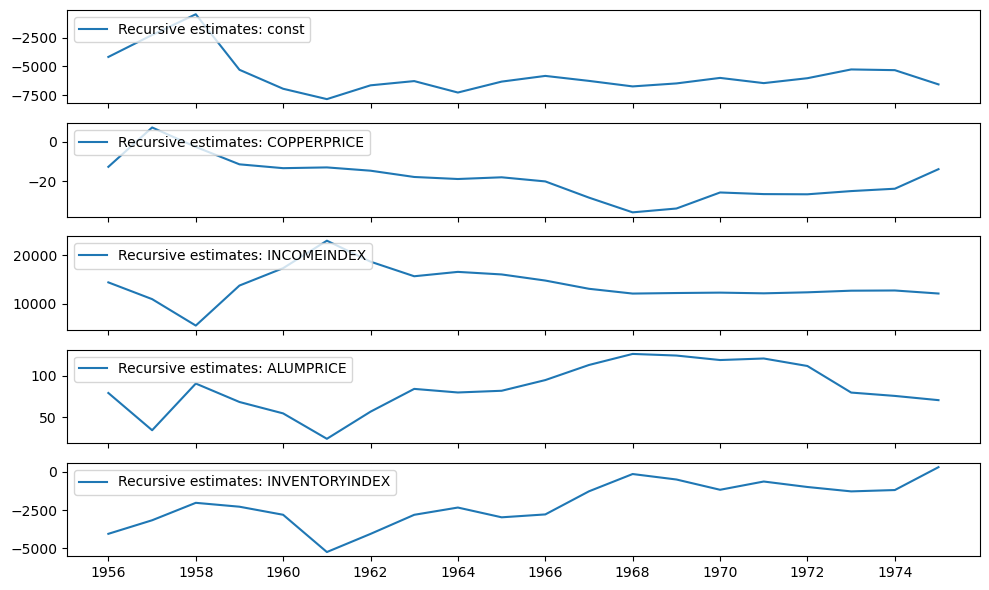

In [30]:
# Plot Recursive Coefficients
res.plot_recursive_coefficient(range(model.k_exog), alpha=None, figsize=(10,6));

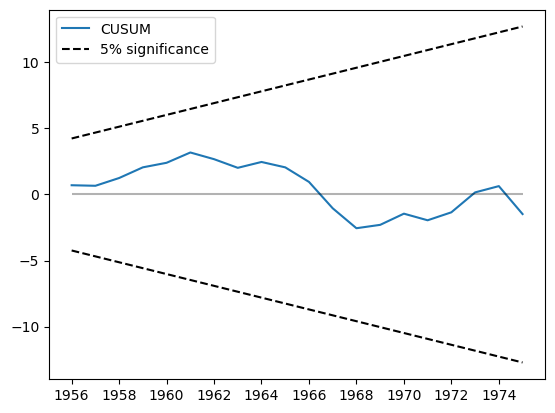

In [36]:
# Plot CUSUM and CUSUM Squares
res.plot_cusum();

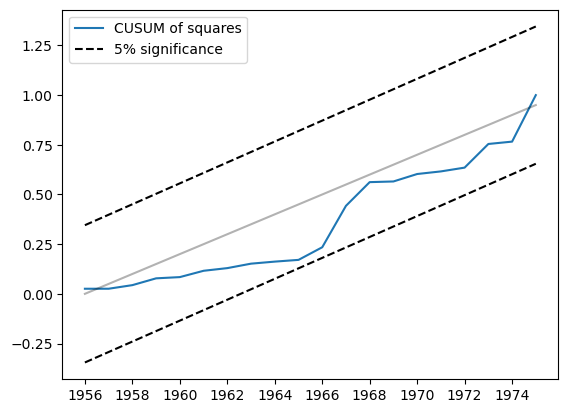

In [31]:
res.plot_cusum_squares();


In [32]:
#Recursive Least Squares with Quantity Theory of Money
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
%matplotlib inline

start='1959-12-01'
end='2015-01-01'
m2=DataReader('M2SL', 'fred', start=start, end=end)
cpi=DataReader('CPIAUCSL', 'fred', start=start, end=end)

In [33]:
#Exponentially Weighted Moving Averages
def ewma(series, beta, n_window):
    nobs = len(series)
    scalar = (1-beta)/(1+beta)
    ma = []
    k = np.arange(n_window,0,-1)
    weights = np.r_[beta**k,1,beta**k[::-1]]
    for t in range(n_window, nobs-n_window):
        window = series.iloc[t - n_window:t + n_window+1].values
        ma.append(scalar*np.sum(weights * window))
    return pd.Series(ma,name=series.name, index=series.iloc[n_window:-n_window].index)



In [34]:
# Calculate EWMA for M2 and CPI
m2_ewma = ewma(np.log(m2['M2SL'].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4)
cpi_ewma = ewma(np.log(cpi['CPIAUCSL'].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4)

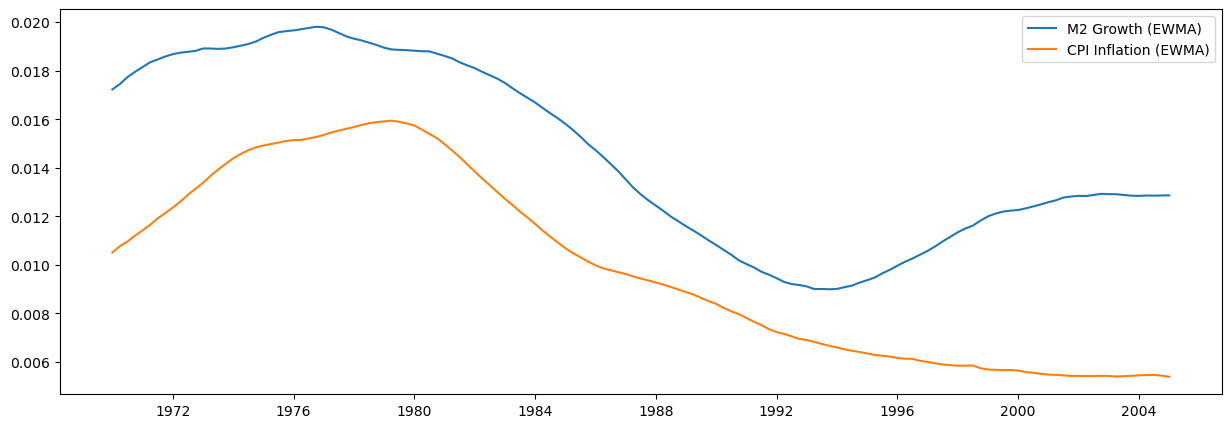

In [71]:
# Plot the EWMA for M2 Growth and CPI Inflation
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(m2_ewma, label="M2 Growth (EWMA)")
ax.plot(cpi_ewma, label="CPI Inflation (EWMA)")
ax.legend();

In [36]:
# Set endogenous and exogenous variables for Recursive Least Squares (RLS)
endog=cpi_ewma
exog=sm.add_constant(m2_ewma)
# Fit Recursive Least Squares (RLS) model
model = sm.RecursiveLS(endog,exog)
res = model.fit()
# Display summary statistics for the RLS model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:               CPIAUCSL   No. Observations:                  141
Model:                    RecursiveLS   Log Likelihood                 692.884
Date:                Thu, 15 Feb 2024   R-squared:                       0.813
Time:                        11:50:04   AIC                          -1381.767
Sample:                    01-01-1970   BIC                          -1375.870
                         - 01-01-2005   HQIC                         -1379.371
Covariance Type:            nonrobust   Scale                            0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.001     -6.014      0.000      -0.004      -0.002
M2SL           0.9128      0.037     24.603      0.000       0.840       0.986
===================================================================================
Ljung-Box (L1) (Q):                 138.24   Jarque-Bera (JB):                18.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""

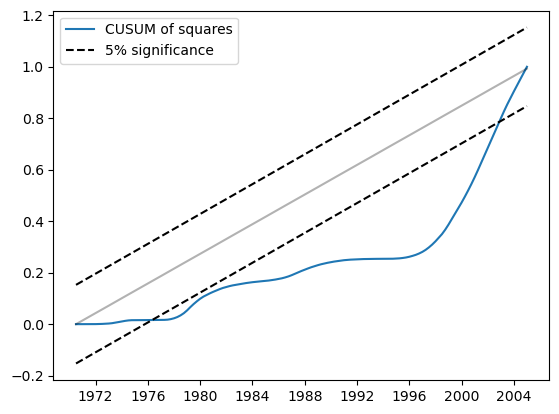

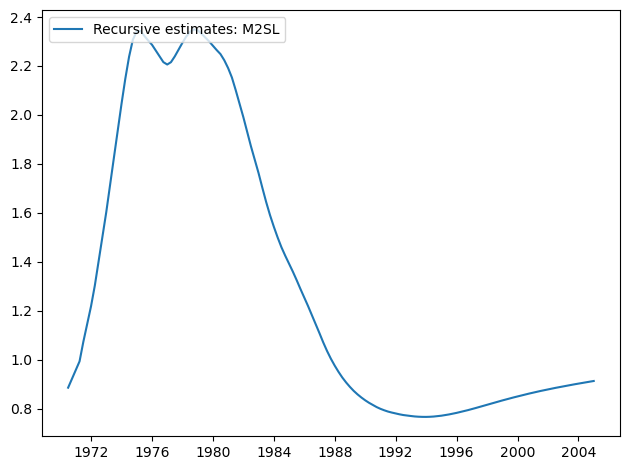

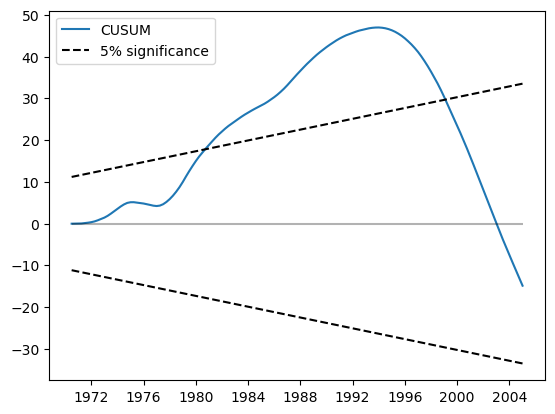

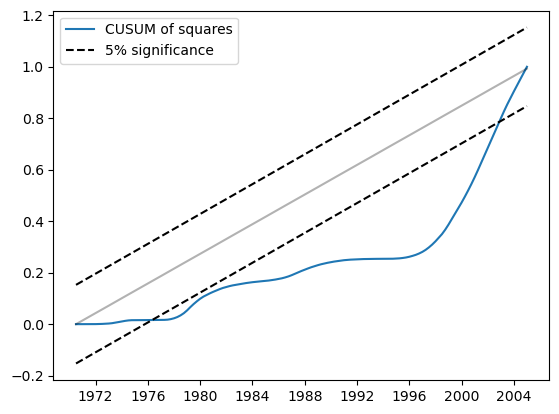

In [37]:
# Plot recursive coefficients, cumulative sum (CUSUM), and CUSUM squares
res.plot_recursive_coefficient(1,alpha=None)
res.plot_cusum()
res.plot_cusum_squares()

In [43]:
# Rolling Regression using Fama-French factors
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start='1-1-1926')[0]
industries = pdr.get_data_famafrench('10_Industry_Portfolios', start='1-1-1926')[0]

# Define endogenous variable and exogenous variable for RollingOLS
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors['Mkt-RF'])

# Perform RollingOLS regression
rols = RollingOLS(endog,exog,window=60)
rres = rols.fit()

# Display parameter estimates for the RollingOLS
params = rres.params
print(params.head())
print(params.tail())

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_10552\43613263.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start='1-1-1926')[0]
C:\Users\Giacomo\AppData\Local\Temp\ipykernel_10552\43613263.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start='1-1-1926')[0]
C:\Users\Giacomo\AppData\Local\Temp\ipykernel_10552\43613263.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries = pdr.get_data

            const  Mkt-RF
Date                     
1926-07-01    NaN     NaN
1926-08-01    NaN     NaN
1926-09-01    NaN     NaN
1926-10-01    NaN     NaN
1926-11-01    NaN     NaN
               const    Mkt-RF
Date                          
2023-08-01  0.476109  1.085737
2023-09-01  0.467433  1.089181
2023-10-01  0.503117  1.082687
2023-11-01  0.587508  1.090195
2023-12-01  0.528967  1.095849


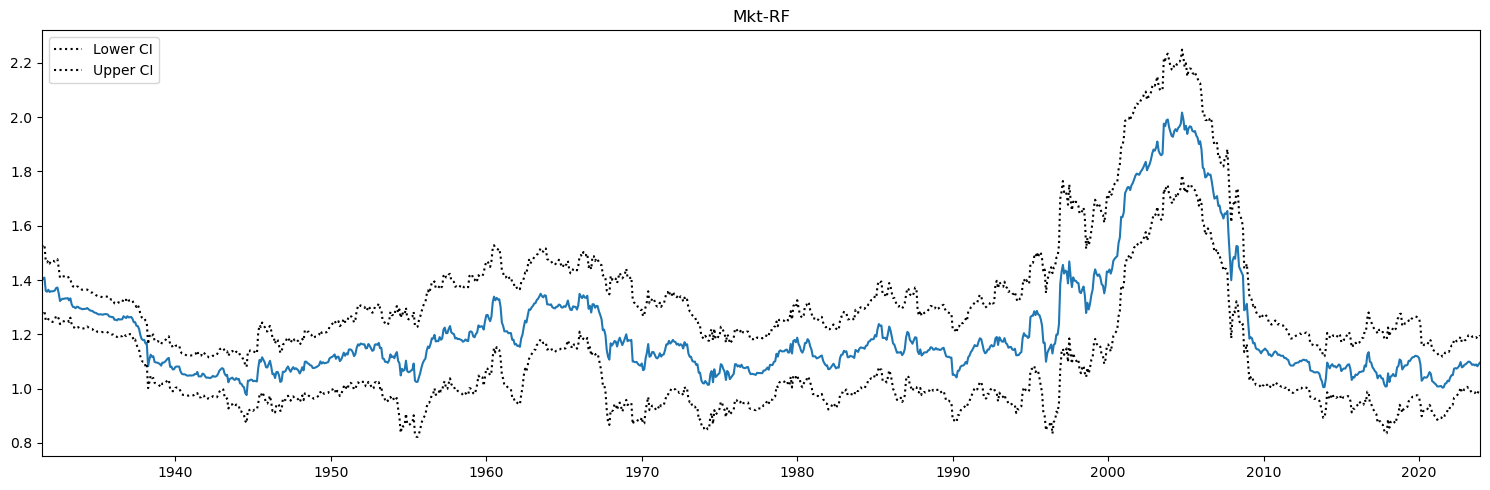

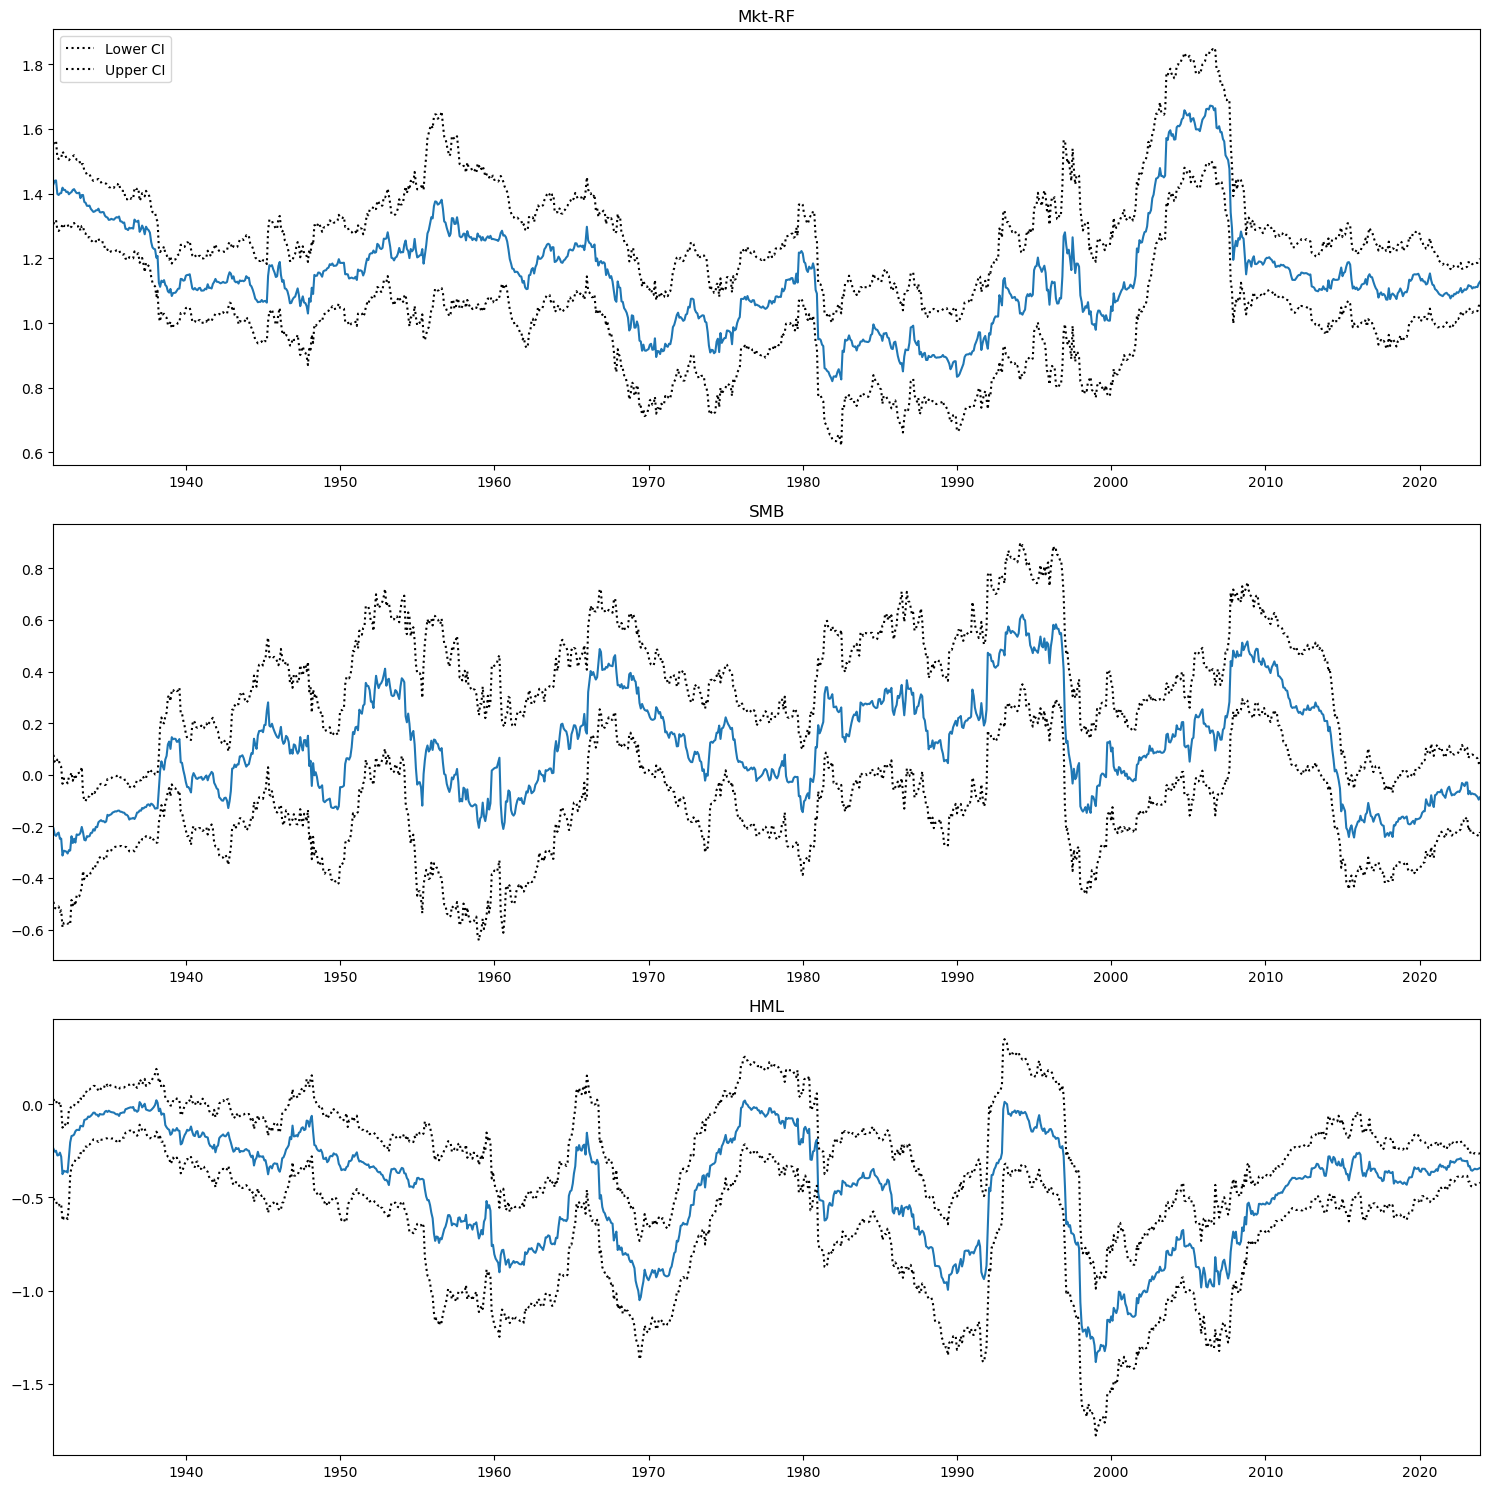

In [44]:
# Plot recursive coefficients for specific variables
rres.plot_recursive_coefficient(variables=["Mkt-RF"], figsize=(15,5));

# Perform RollingOLS regression with multiple exogenous variables
exog_vars = ['Mkt-RF', 'SMB', 'HML']
exog = sm.add_constant(factors[exog_vars])
rols = RollingOLS(endog,exog, window=60)
rres = rols.fit()

# Plot recursive coefficients for multiple exogenous variables
rres.plot_recursive_coefficient(variables=exog_vars, figsize=(15,15));

In [45]:
#Regression Diagnostics
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = sm.datasets.get_rdataset("Guerry", "HistData").data
res = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=df).fit()
# Display summary statistics for the OLS regression
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.90e-08
Time:                        11:57:19   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Test for normality of residuals using Jarque-Bera test
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(res.resid)
lzip(name,test)

[('Jarque-Bera', 3.3936080248431706),
 ('Chi^2 two-tail prob.', 0.18326831231663335),
 ('Skew', -0.486580343112234),
 ('Kurtosis', 3.0034177578816332)]

In [47]:
#Influence Tests
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(res)
# Display dfbeta values for influential observations
test_class.dfbeta[5:,:]

array([[ 8.26794653e-01, -9.37228508e-03, -3.91782694e-02],
       [-4.60565242e-01, -6.00836231e-03,  1.07905336e-01],
       [ 2.20296666e+00, -8.83371102e-03, -2.94410442e-01],
       [-3.09677967e+00, -1.44344868e-02,  5.88879087e-01],
       [-6.94207982e-01,  8.22842167e-04,  1.03706847e-01],
       [ 4.10842584e-01, -1.11761663e-02,  7.29888204e-02],
       [-1.89562753e-01,  2.08460190e-03, -6.30431760e-02],
       [ 2.38248735e+00, -6.58585145e-03, -3.89952698e-01],
       [ 4.44134010e+00, -7.37883826e-03, -6.57505666e-01],
       [ 3.65734696e-02, -2.06183483e-03,  3.90285143e-02],
       [ 1.48071908e-01,  4.65456319e-05, -2.83829919e-02],
       [-4.66538011e+00,  2.34268272e-02,  5.91701800e-01],
       [ 2.88977165e+00, -2.35317798e-02, -2.90569539e-01],
       [-6.22764720e-02,  1.28974407e-03,  5.15640285e-03],
       [-8.19834682e+00, -3.43559449e-02,  1.69772160e+00],
       [ 4.31761529e+00, -1.53701973e-02, -5.82861140e-01],
       [-4.22405692e+00, -2.94719098e-02

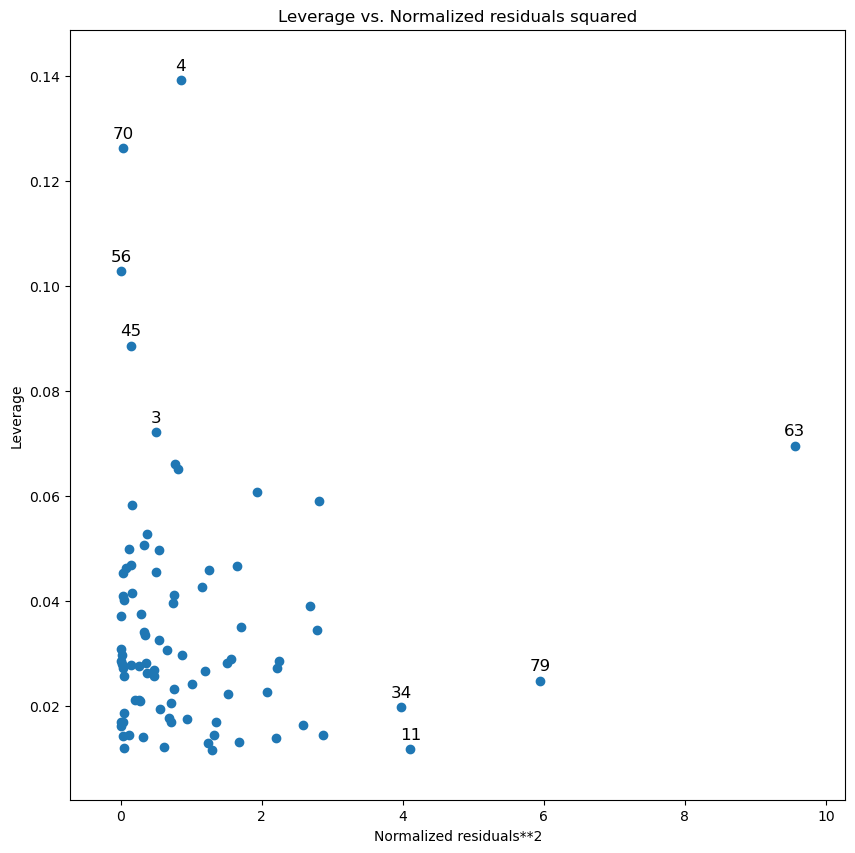

In [48]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
# Plot Leverage-Residual Squared (Cook's Distance) plot
fig, ax = plt.subplots(figsize=(10,10))
fit = plot_leverage_resid2(res, ax=ax)

In [49]:
#Multicollinearity
# Check for multicollinearity using the condition number
np.linalg.cond(res.model.exog)
#Heteroskedasticity
# Perform Breusch-Pagan test for heteroskedasticity
name = ['Lagrande multiplier stat', 'g-value', 'f-value', 'f g-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name,test)

[('Lagrande multiplier stat', 4.893213374093967),
 ('g-value', 0.0865869050235217),
 ('f-value', 2.5037159462564396),
 ('f g-value', 0.08794028782672986)]

In [50]:
# Perform Goldfeld-Quandt test for heteroskedasticity
name=['F stat', 'p-value']
test = sms.het_goldfeldquandt(res.resid, res.model.exog)
lzip(name,test)

[('F stat', 1.1002422436378143), ('p-value', 0.38202950686925324)]

In [51]:
#Linearity
# Perform Harvey-Collier linearity test
name = ['t value','p value']
test = sms.linear_harvey_collier(res)
lzip(name,test)

[('t value', -1.0796490077827041), ('p value', 0.28346392475394466)]

In [52]:
#Weighted Least Squares
# Generate fake data with heteroscedasticity
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

np.random.seed(42)
%matplotlib inline

#WLS Estimation
#Fake data: Heteroscedascity of 2 groups

#Assumptions:

#Misspecification: true model will be quadratic, est. linear
#Ind noise/error term
#two groups for error variance, low and high var groups

In [53]:
nsample = 50
x = np.linspace(0,20,nsample)
X = np.column_stack((x,(x-5)**2))
X = sm.add_constant(X)
beta=[5.,0.5,-0.01]
sig=0.5
w=np.ones(nsample)
w[nsample*6//10:]=3
y_true = np.dot(X,beta)
e=np.random.normal(size=nsample)
y=y_true+sig*w*e
X = X[:,[0,1]]

In [54]:
# Fit WLS model with known true variance ratio of heteroscedasticity
mod_wls = sm.WLS(y,X,weights=1./(w**2))
res_wls = mod_wls.fit()
# Display summary statistics for WLS model
res_wls.summary()
# OLS vs WLS comparison
res_ols = sm.OLS(y,X).fit()
print(res_ols.params)
print(res_wls.params)


[5.55959672 0.36181418]
[5.31057184 0.40328365]


In [55]:
#Compare WLS std error to hetero corrected OLS std errors
se = np.vstack([[res_wls.bse], [res_ols.bse], [res_ols.HC0_se], [res_ols.HC1_se], [res_ols.HC2_se],[res_ols.HC3_se] ])
se = np.round(se,4)
colnames = ['x1','const']
rownames = ['WLS','OLS', 'OLS_HC0', 'OLS_HC1', 'OLS_HC2', 'OLS_HC3']
tab1 = SimpleTable(se,colnames,rownames,txt_fmt=default_txt_fmt)
print(tab1)


          x1   const 
---------------------
WLS     0.1539 0.0195
OLS     0.2907 0.0251
OLS_HC0 0.1863 0.0261
OLS_HC1 0.1901 0.0267
OLS_HC2 0.1923  0.027
OLS_HC3 0.1986 0.0278
---------------------


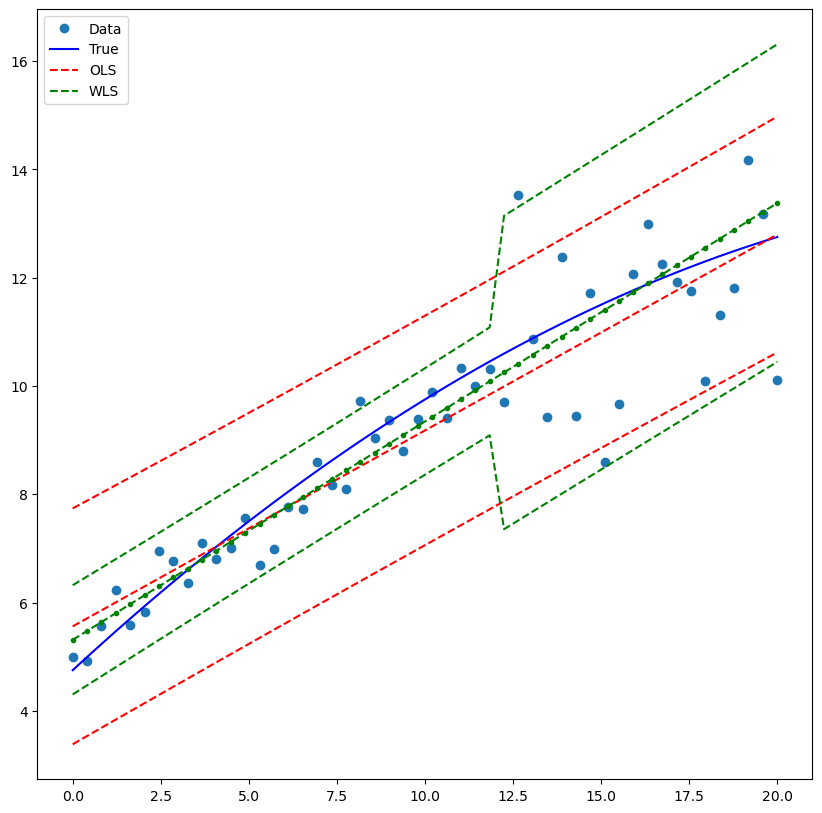

In [56]:
# Predictions and Confidence Intervals
covb=res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X*np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975,res_ols.df_resid)
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)
# Draw comparison between WLS and OLS predictions
prstd, iv_1, iv_u = wls_prediction_std(res_wls)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_1, 'g--', label='WLS')
ax.plot(x, iv_u, 'g--')
ax.legend(loc="best");

In [57]:
#Linear Mixed Effects Models
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

data = sm.datasets.get_rdataset("dietox", "geepack").data
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [58]:
model = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
res = model.fit(method=["lbfgs"])
# Display summary statistics for the Linear Mixed Effects Model
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [59]:
# Extended Linear Mixed Effects Model with additional random effects term
model_2=smf.mixedlm("Weight~Time", data, groups=data['Pig'], re_formula="~Time")

free=sm.regression.mixed_linear_model.MixedLMParams.from_components(np.ones(2), np.eye(2))
res_2 = model_2.fit(method=["lbfgs"], free=free)
res_2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0283    
Min. group size:   11       Log-Likelihood:      -2217.3481
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.554 28.388 0.000 14.652 16.825
Time              6.939    0.080 86.248 0.000  6.781  7.097
Group Var        19.837    1.571                           
Group x Time Cov  0.000    0.000                           
Time Var          0.423    0.033                           
===========================================================

"""

In [60]:
# Another example with the Sitka dataset
data = sm.datasets.get_rdataset("Sitka", "MASS").data
endog = data["size"]
data["Intercept"] = 1
exog = data[["Intercept", "Time"]]
model = sm.MixedLM(endog, exog, groups=data['tree'], exog_re=exog["Intercept"])
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: size    
No. Observations:  395     Method:             REML    
No. Groups:        79      Scale:              0.0392  
Min. group size:   5       Log-Likelihood:     -82.3884
Max. group size:   5       Converged:          Yes     
Mean group size:   5.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.273    0.088 25.864 0.000  2.101  2.446
Time          0.013    0.000 47.796 0.000  0.012  0.013
Intercept Var 0.374    0.345                           
=======================================================

"""

In [61]:
re = res.cov_re.values[0,0]

In [62]:
#Regression Plots with the Prestige Dataset
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [63]:
model = ols("prestige~income+education", data = prestige).fit()
# Display summary statistics for the OLS regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           8.65e-17
Time:                        11:58:25   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

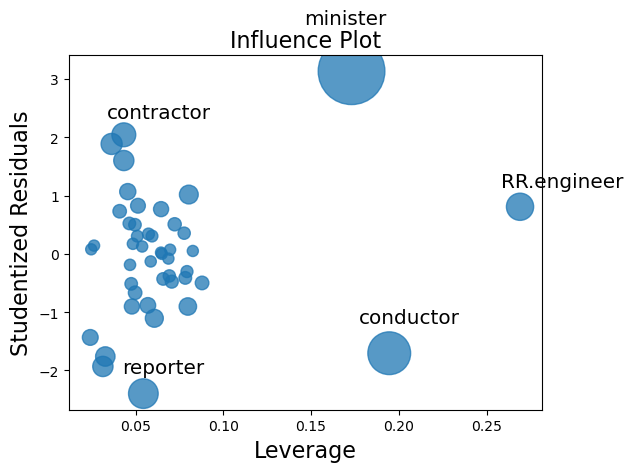

In [64]:
#Influence Plots
# plt.figure(figsize=(10,10))
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1)

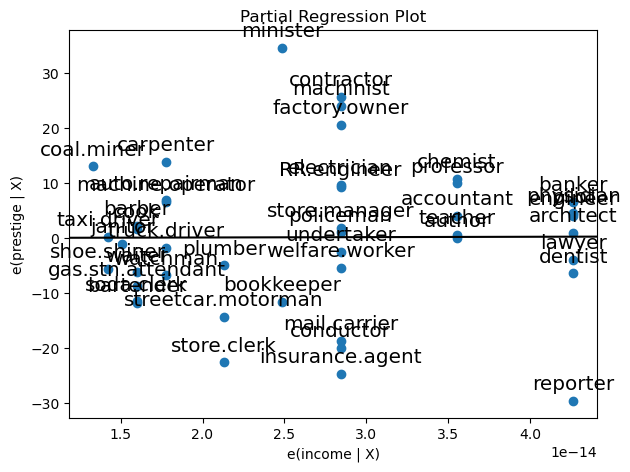

In [65]:
#Partial Regression Plot
fig = sm.graphics.plot_partregress("prestige","income",["income","education"], data=prestige)
fig.tight_layout(pad=1.0)

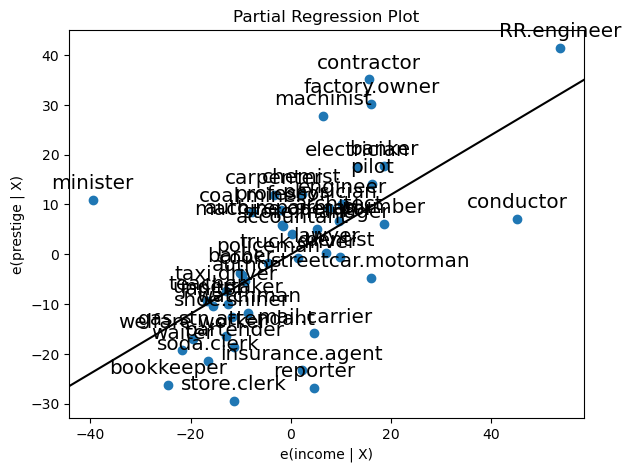

In [66]:
fig = sm.graphics.plot_partregress("prestige","income",["education"], data=prestige)
fig.tight_layout(pad=1.0)

In [67]:
# Subset the data and fit another OLS model
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])
model2 = ols("prestige~income+education", data=prestige, subset=subset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           2.02e-18
Time:                        11:58:39   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.094     -13.760       1.125
income         0.9307      0.154      6.053      0.000       0.620       1.242
education      0.2846      0.121      2.345      0.024       0.039       0.530
==============================================================================
Omnibus:                        3.811   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.802
Skew:                          -0.614   Prob(JB):                        0.246
Kurtosis:                       3.303   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

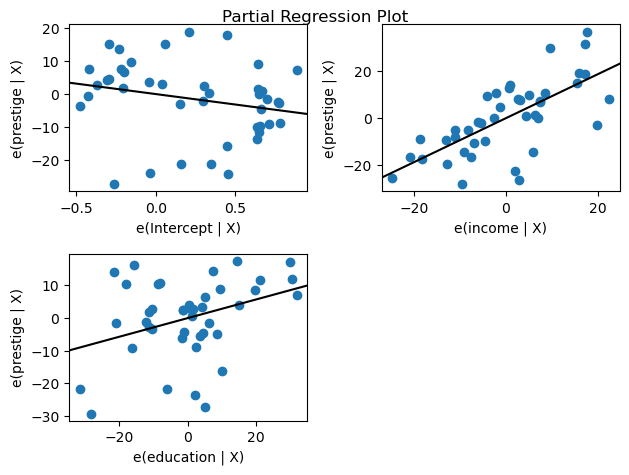

In [68]:
# Plot partial regression grid for the subset
fig = sm.graphics.plot_partregress_grid(model2)

In [69]:
#Interaction of Categorical Variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline
np.random.seed(42)

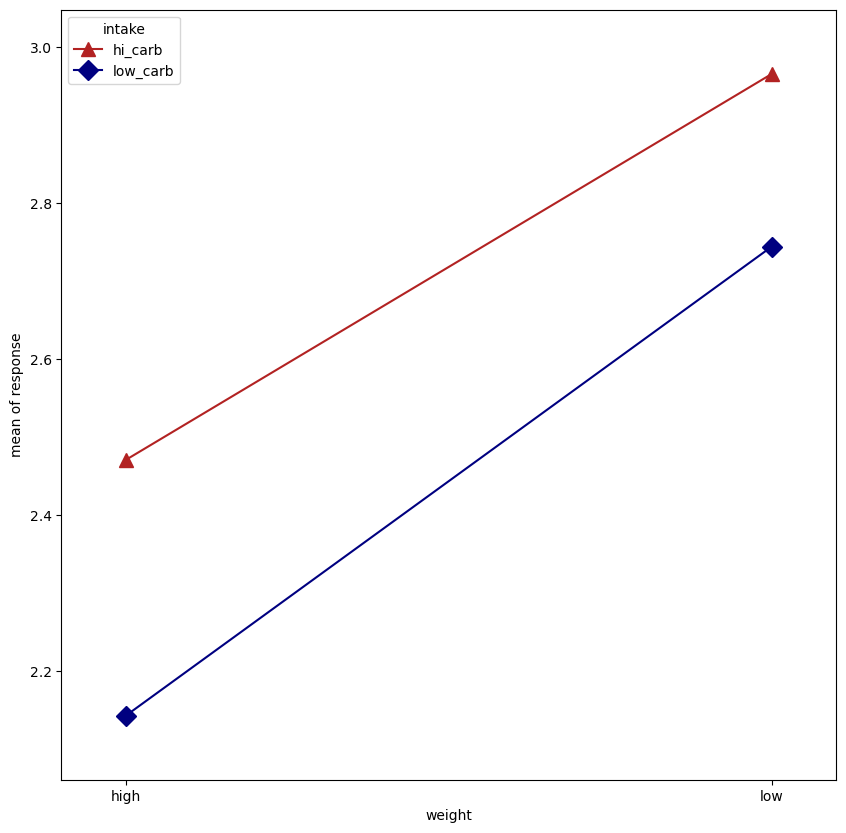

In [70]:
weight = pd.Series(np.repeat(['low','high', 'low', 'high'], 15), name="weight")
intake = pd.Series(np.repeat(['low_carb','hi_carb'], 30), name="intake")
days = np.log(np.random.randint(1, 30, size=60))
fig, ax = plt.subplots(figsize=(10, 10))
fig = interaction_plot(
    x=weight,
    trace=intake,
    response=days,
    colors=['firebrick', 'navy'],
    markers=['^','D'], 
    ms=10,
    ax=ax
)